In [1]:
# 모듈 임포트
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 다항 회귀(Polynomial Regression)

- Polynomial Regression과 과대적합/과소적합의 이해

## 다항 회귀(Polynomial Regression) 이해

**다중선형회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{3} + ... + w_n X_{n} $
- 독립변수(festure)와 종속변수(target)의 관계가 일차방정식으로 표현된 회귀
- 직선으로 표현

**다항회귀**

$ y = w_0 + w_1 X_{1} + w_2 X_{2} + w_3 X_{1}X_{2} + w_4 X_{1}^2 + w_5 X_{2}^2 $

- 회귀가 독립변수의 일차식이 아닌 2차식, 3차식 등 다항식으로 표현되는 회귀식
- 선형회귀임

$ z=[X_{1} , X_{2} , X_{1}X_{2} , X_{1}^2, X_{2}^2 ] $라고 하면

$ y = w_0 + w_1 Z_{1} + w_2 Z_{2} + w_3 Z_{3} + w_4 Z_{4} + w_5 Z_{5} $

**사이킷런은 다항회귀를 위한 클래스를 명시적으로 제공하지 않음**
- 다항 회귀가 선형 회귀이므로 PolynomalFeatures 클래스를 통해 독립변수(피처)를 다항식 피처로 변환

PolynomialFeatures(degree=차수)

fit_transform(피처)

In [108]:
X = np.array([1,2,1,3]).reshape(2,2)
print(X)

poly = PolynomialFeatures(degree=2)
poly.fit_transform(X)

[[1 2]
 [1 3]]


array([[1., 1., 2., 1., 2., 4.],
       [1., 1., 3., 1., 3., 9.]])

In [109]:
X = np.array([1,2,3,2,2,3,1,2,3]).reshape(3,3)
print(X)

poly3 = PolynomialFeatures(degree=3)
poly3.fit_transform(X)

[[1 2 3]
 [2 2 3]
 [1 2 3]]


array([[ 1.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.,  1.,  2.,  3.,
         4.,  6.,  9.,  8., 12., 18., 27.],
       [ 1.,  2.,  2.,  3.,  4.,  4.,  6.,  4.,  6.,  9.,  8.,  8., 12.,
         8., 12., 18.,  8., 12., 18., 27.],
       [ 1.,  1.,  2.,  3.,  1.,  2.,  3.,  4.,  6.,  9.,  1.,  2.,  3.,
         4.,  6.,  9.,  8., 12., 18., 27.]])

In [110]:
X = np.arange(12).reshape(4,3)
print(X)

poly3 = PolynomialFeatures(degree=3)
poly3.fit_transform(X)

[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]]


array([[1.000e+00, 0.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 2.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 2.000e+00,
        4.000e+00, 8.000e+00],
       [1.000e+00, 3.000e+00, 4.000e+00, 5.000e+00, 9.000e+00, 1.200e+01,
        1.500e+01, 1.600e+01, 2.000e+01, 2.500e+01, 2.700e+01, 3.600e+01,
        4.500e+01, 4.800e+01, 6.000e+01, 7.500e+01, 6.400e+01, 8.000e+01,
        1.000e+02, 1.250e+02],
       [1.000e+00, 6.000e+00, 7.000e+00, 8.000e+00, 3.600e+01, 4.200e+01,
        4.800e+01, 4.900e+01, 5.600e+01, 6.400e+01, 2.160e+02, 2.520e+02,
        2.880e+02, 2.940e+02, 3.360e+02, 3.840e+02, 3.430e+02, 3.920e+02,
        4.480e+02, 5.120e+02],
       [1.000e+00, 9.000e+00, 1.000e+01, 1.100e+01, 8.100e+01, 9.000e+01,
        9.900e+01, 1.000e+02, 1.100e+02, 1.210e+02, 7.290e+02, 8.100e+02,
        8.910e+02, 9.000e+02, 9.900e+02, 1.089e+03, 1.000e+03, 1.100e+03,
        1.210e+03, 

**3차 다항식 결정값을 구하는 함수 polynomial_func(X) 생성**

즉 회귀식은 결정값 $y = 1+ 2x_1 + 3x_1^2 + 4x_2^3$ 

**3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습**

In [111]:
from sklearn.linear_model import LinearRegression

# X = np.arange(0, 4).reshape(2,2)
X = np.array([2,3,4,2,9,1]).reshape(3,2)
print(X)
y = 1 + 2 * X[:, 0] + 3*X[:, 0]**2 + 4*X[:, 1]**3

poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수', poly_ftr)

model = LinearRegression()
model.fit(poly_ftr, y)
print('다항 (polynomial) 회귀계수',np.round(model.coef_, 2))

[[2 3]
 [4 2]
 [9 1]]
3차 다항식 계수 [[  1.   2.   3.   4.   6.   9.   8.  12.  18.  27.]
 [  1.   4.   2.  16.   8.   4.  64.  32.  16.   8.]
 [  1.   9.   1.  81.   9.   1. 729.  81.   9.   1.]]
다항 (polynomial) 회귀계수 [-0.   -0.12  0.07 -0.47 -0.15  0.37  0.42 -1.2   0.11  1.43]


### 파이프라인(Pipeline)을 이용한 3차 다항회귀 학습  

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합

**`sklearn.pipeline의 Pipeline 클래스`**

- 연속된 변환을 순서대로 처리할 수 있도록 도와주는 클래스

- 형식 : 연속된 단계를 나타내는 (name, transforms) 튜플 목록을 입력받음
    - 마지막 단계에서는 transforms와 estimator를 모두 사용할 수 있고, 그외는 transforms여야 함
    - transforms는 fit_transform() 메서드를 가지고 있어야 함
    - estrimator는 fit(), predict() 메서드를 가지고 있어야 함
    
- 파이프라인의 fit() 메서드 호출:
    - 모든 transforms의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달
    - 마지막 단계에서는 fit()메서드만 호출

- 파이프라인 객체는 마지막 estimator와 동일한 메서드를 제공

In [112]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression())])

pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear', LinearRegression())])

In [113]:
np.round(pipe.named_steps['linear'].coef_, 2)

array([-0.  , -0.12,  0.07, -0.47, -0.15,  0.37,  0.42, -1.2 ,  0.11,
        1.43])

### 가상 데이터 생성 및 다항 회귀 추정

**가상 데이터 생성**

In [114]:
# 2차 다항식 : 0.5*X^2 + 2*X +2

n = 100
X = np.random.rand(n, 1)*6 - 3 # 0~1 사이 값을 n행 1열
y = 0.5*X**2 + 2*X + 2 + np.random.randn(n, 1) # randn 평균 0, 분산 1 인 normal 데이터

In [115]:
X.shape, y.shape

((100, 1), (100, 1))

**scatterplot**

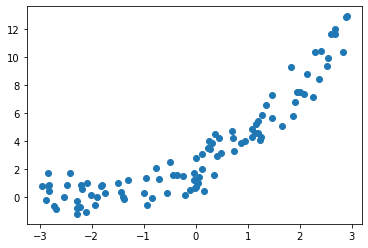

In [116]:
plt.scatter(X, y)

- 비선형적으로 분포
- 사이킷런의 PolynomialFeatures를 사용

**다항식으로 변환**

In [117]:
pipe = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), ('linear', LinearRegression())])

pipe.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                ('linear', LinearRegression())])

In [118]:
X_poly

array([[-1.39202281e+00,  1.93772750e+00],
       [ 2.85390553e+00,  8.14477676e+00],
       [ 1.50447838e+00,  2.26345520e+00],
       [-4.75318390e-01,  2.25927572e-01],
       [-1.11773700e+00,  1.24933600e+00],
       [ 2.01539159e+00,  4.06180325e+00],
       [ 1.66566199e+00,  2.77442986e+00],
       [ 2.53783650e+00,  6.44061409e+00],
       [ 9.60969062e-01,  9.23461538e-01],
       [-2.80166633e+00,  7.84933423e+00],
       [-1.80720124e+00,  3.26597632e+00],
       [-1.14747818e+00,  1.31670617e+00],
       [-2.10304963e+00,  4.42281776e+00],
       [ 9.01682780e-01,  8.13031835e-01],
       [-1.32374833e+00,  1.75230964e+00],
       [-9.40785251e-01,  8.85076888e-01],
       [-2.88618016e+00,  8.33003590e+00],
       [ 2.79602914e+00,  7.81777898e+00],
       [ 2.79492350e+00,  7.81159737e+00],
       [ 1.62624964e+00,  2.64468789e+00],
       [-1.32779785e+00,  1.76304714e+00],
       [ 1.28926454e+00,  1.66220306e+00],
       [ 2.69093810e+00,  7.24114785e+00],
       [ 8.

**선형회귀 LinearRegression 적용하여 회귀계수 추정**

In [119]:
np.round(pipe.named_steps['linear'].coef_, 2)

array([[1.97, 0.52]])

In [120]:
np.round(pipe.named_steps['linear'].intercept_, 2)

array([1.94])

**다항회귀식 시각화**

In [121]:
poly3 = PolynomialFeatures(degree=2, include_bias=False)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_poly = poly3.fit_transform(X_new)

lr2 = LinearRegression()
lr2.fit(X_poly, y)

y_pred = lr2.predict(X_poly)

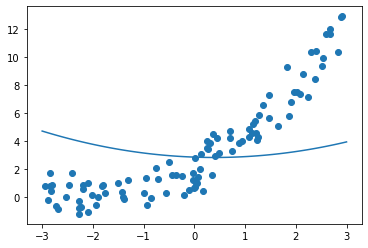

In [122]:
plt.scatter(X, y)
plt.plot(X_new, y_pred)

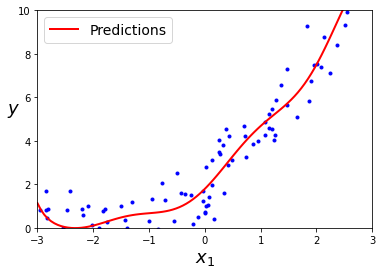

In [140]:
poly_feat = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_feat.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_feat.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

### 다항회귀를 이용한 보스톤 집값 예측

In [102]:
# 모듈 임포트
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# features & target
boston = load_boston()

X = boston.data
y = boston.target

# train & test dataset split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=156)


/opt/homebrew/Caskroom/miniforge/base/envs/multi_crawling/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datase

In [103]:
bostonM = Pipeline([('poly',PolynomialFeatures(degree=2)), ('linear',LinearRegression())])


In [104]:
bostonM.fit(X_train, y_train)
np.round(bostonM.named_steps['linear'].coef_, 2)

array([ 1.0906374e+09, -8.1400000e+00, -1.0000000e-01, -7.0000000e+00,
        3.6980000e+01,  2.5363000e+02,  3.0970000e+01,  1.0900000e+00,
       -1.2020000e+01,  3.1000000e+00, -6.0000000e-02,  7.7500000e+00,
        2.0000000e-02,  4.6000000e-01, -0.0000000e+00,  2.7000000e-01,
        6.8000000e-01,  1.8600000e+00, -1.2000000e-01,  9.0000000e-02,
        0.0000000e+00, -2.0000000e-01,  5.8000000e-01, -6.0000000e-02,
        8.7000000e-01, -0.0000000e+00,  4.0000000e-02, -0.0000000e+00,
       -2.0000000e-02, -1.7000000e-01, -2.0900000e+00, -2.0000000e-02,
        0.0000000e+00, -2.0000000e-02,  1.0000000e-02,  0.0000000e+00,
       -2.0000000e-02,  0.0000000e+00, -1.0000000e-02,  5.0000000e-02,
       -4.9000000e-01, -9.0000000e-02,  2.9000000e-01,  1.0000000e-02,
        2.1000000e-01, -5.0000000e-02,  0.0000000e+00, -3.0000000e-02,
        1.0000000e-02, -1.0000000e-02,  3.6980000e+01, -2.9240000e+01,
       -5.9500000e+00, -5.0000000e-02,  1.7700000e+00, -2.0000000e-02,
      

In [105]:
bostonM.named_steps['linear'].coef_.shape

(105,)

In [106]:
pred = bostonM.predict(X_test)
mse = mean_squared_error(y_test, pred)
r2 = r2_score(y_test, pred)

print(mse)
print(np.sqrt(mse))
print(r2)

24.282312584016385
4.927708654538779
0.6591816646787887
